In [20]:
#!/usr/bin/env python

# --------------------------------------------------------
# Tensorflow Faster R-CNN
# Licensed under The MIT License [see LICENSE for details]
# Written by Xinlei Chen, based on code from Ross Girshick
# --------------------------------------------------------

"""
Demo script showing detections in sample images.

See README.md for installation instructions before running.
"""

import sys
print(sys.executable)

%matplotlib inline
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os.path as osp

import _init_paths


def add_path(path):
    if path not in sys.path:
        sys.path.insert(0, path)
this_dir = osp.dirname("./")
lib_path = osp.join(this_dir, '..')
add_path(lib_path)

import torch

from model.config import cfg
from model.test import im_detect
from model.nms_wrapper import nms

from utils.timer import Timer
import matplotlib.pyplot as plt
import numpy as np
import os, cv2
import argparse

# from lib.nets.vgg16 import vgg16
from nets.resnet_v1 import resnetv1
from nets.resnet_v1 import resnet50

from bs4 import BeautifulSoup
import matplotlib.patches as patches

from glob import glob

import random
random.seed(0)

CLASSES = ('__background__',
           'aeroplane', 'bicycle', 'bird', 'boat',
           'bottle', 'bus', 'car', 'cat', 'chair',
           'cow', 'diningtable', 'dog', 'horse',
           'motorbike', 'person', 'pottedplant',
           'sheep', 'sofa', 'train', 'tvmonitor')

CLASSES = ('__background__', 
           'd00', 'd01', 'd10', 'd11', 'd20', 'd40', 'd43', 'd44', 'd30')

# NETS = {'vgg16': ('vgg16_faster_rcnn_iter_%d.pth',),'res101': ('res101_faster_rcnn_iter_%d.pth',)}
NETS = {'res50': ('res50_faster_rcnn_iter_%d.pth',), 'res101': ('res101_faster_rcnn_iter_%d.pth',)}
# DATASETS= {'pascal_voc': ('voc_2007_trainval',),'pascal_voc_0712': ('voc_2007_trainval+voc_2012_trainval',)}
DATASETS= {'rddc': ('rddc_2018_train',)}


/home/kluger/anaconda3/envs/pytorch/bin/python


In [21]:
def vis_detections(im, class_name, dets, thresh=0.5, ax=None):
    """Draw detected bounding boxes."""
    inds = np.where(dets[:, -1] >= thresh)[0]
    if len(inds) == 0:
        return


    for i in inds:
        bbox = dets[i, :4]
        score = dets[i, -1]

        ax.add_patch(
            plt.Rectangle((bbox[0], bbox[1]),
                          bbox[2] - bbox[0],
                          bbox[3] - bbox[1], fill=False,
                          edgecolor='yellow', linewidth=3.5)
            )
        ax.text(bbox[0], bbox[1] - 2,
                '{:s} {:.3f}'.format(class_name, score),
                bbox=dict(facecolor='blue', alpha=0.5),
                fontsize=14, color='white')

    ax.set_title(('detections with '
                  'p(class | box) >= {:.1f}').format(thresh),
                  fontsize=14)
    plt.axis('off')
    plt.tight_layout()
    plt.draw()


In [22]:
def demo(net, image_name):
    """Detect object classes in an image using pre-computed object proposals."""

    # Load the demo image
    im_file = os.path.join(cfg.DATA_DIR, 'rddc_2018/JPEGImages', image_name)
    im = cv2.imread(im_file)

    # Detect all object classes and regress object bounds
    timer = Timer()
    timer.tic()
    scores, boxes = im_detect(net, im)
    timer.toc()
    print('Detection took {:.3f}s for {:d} object proposals'.format(timer.total_time(), boxes.shape[0]))

    # Visualize detections for each class
    CONF_THRESH = 0.5
    NMS_THRESH = 0.3
    
    im = im[:, :, (2, 1, 0)]
    fig, ax = plt.subplots(figsize=(12, 12))
    ax.imshow(im, aspect='equal')
    
    for cls_ind, cls in enumerate(CLASSES[1:]):
        cls_ind += 1 # because we skipped background
        cls_boxes = boxes[:, 4*cls_ind:4*(cls_ind + 1)]
        cls_scores = scores[:, cls_ind]
        dets = np.hstack((cls_boxes,
                          cls_scores[:, np.newaxis])).astype(np.float32)
        keep = nms(torch.from_numpy(dets), NMS_THRESH)
        dets = dets[keep.numpy(), :]
        vis_detections(im, cls, dets, thresh=CONF_THRESH, ax=ax)
        
    return ax

In [23]:
demonet = 'res101' # Network to use [vgg16 res101]
dataset = 'rddc' # Trained dataset [pascal_voc pascal_voc_0712]

In [24]:
# category name is from above, dataset is either "train" or
# "val" or "train_val"
def imgs_from_category(cat_name, dataset):
    filename = os.path.join(set_dir, cat_name + "_" + dataset + ".txt")
    df = pd.read_csv(
        filename,
        delim_whitespace=True,
        header=None,
        names=['filename', 'true'])
    return df

def imgs_from_category_as_list(cat_name, dataset):
    df = imgs_from_category(cat_name, dataset)
    df = df[df['true'] == 1]
    return df['filename'].values

def annotation_file_from_img(img_name):
    tmp = os.path.join(cfg.DATA_DIR, 'rddc_2018/Annotations', img_name) + ".xml"
    return tmp

# annotation operations
def load_annotation(img_filename):
    xml = ""
    with open(annotation_file_from_img(img_filename)) as f:
        xml = f.readlines()
    xml = ''.join([line.strip('\t') for line in xml])
    return BeautifulSoup(xml, "xml")

def get_all_obj_and_box(objname, img_set):
    img_list = imgs_from_category_as_list(objname, img_set)
    
    for img in img_list:
        annotation = load_annotation(img)

../output/res101/rddc_2018_train/default/res101_faster_rcnn_iter_150000.pth
Loaded network ../output/res101/rddc_2018_train/default/res101_faster_rcnn_iter_150000.pth
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Chiba_00090
Detection took 0.119s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Chiba_00270
Detection took 0.113s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Adachi_00446
Detection took 0.112s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Adachi_00853
Detection took 0.110s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Sumida_00861
Detection took 0.111s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Numazu_00926
Detection took 0.139s for 300 object proposals
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
Demo for data/demo/train_Sumida_00699
Detection took 0.126s for 300 objec

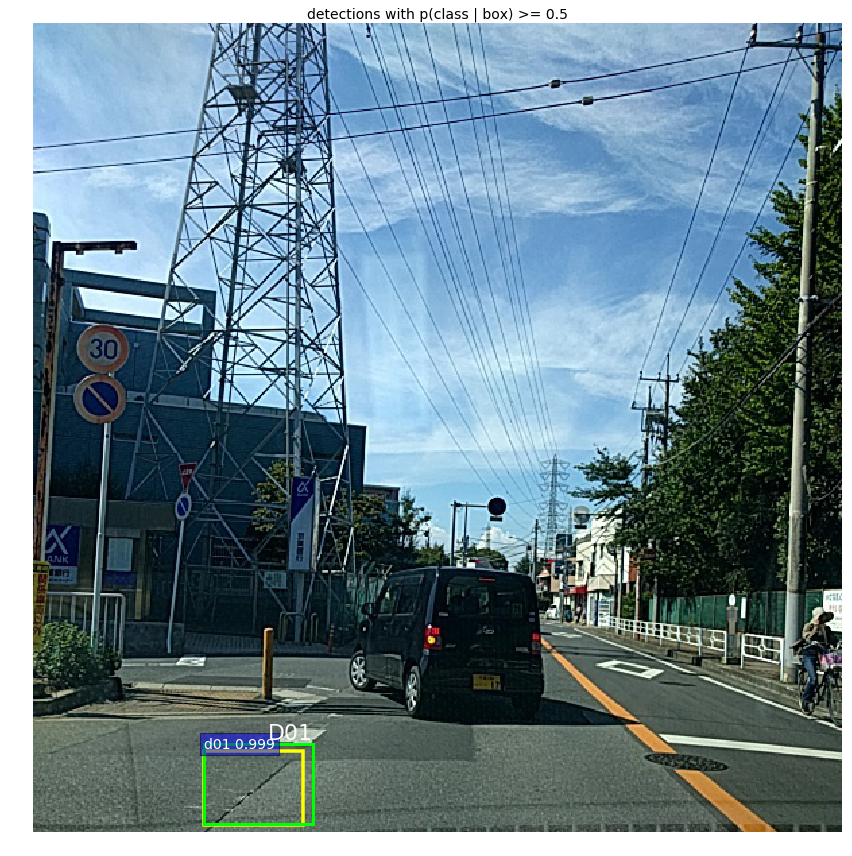

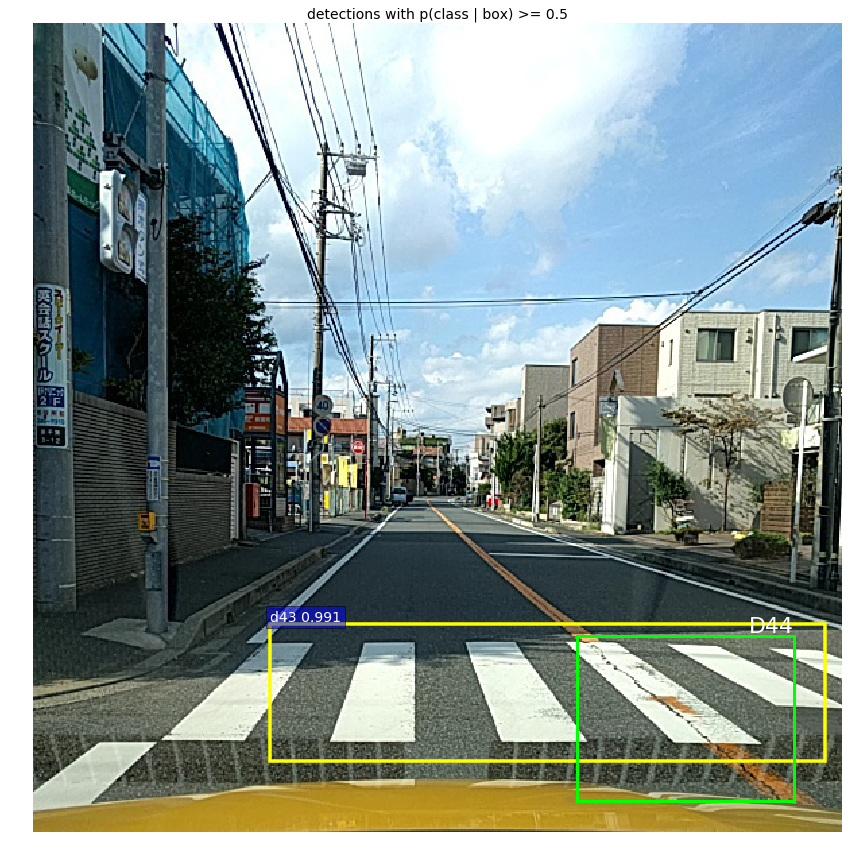

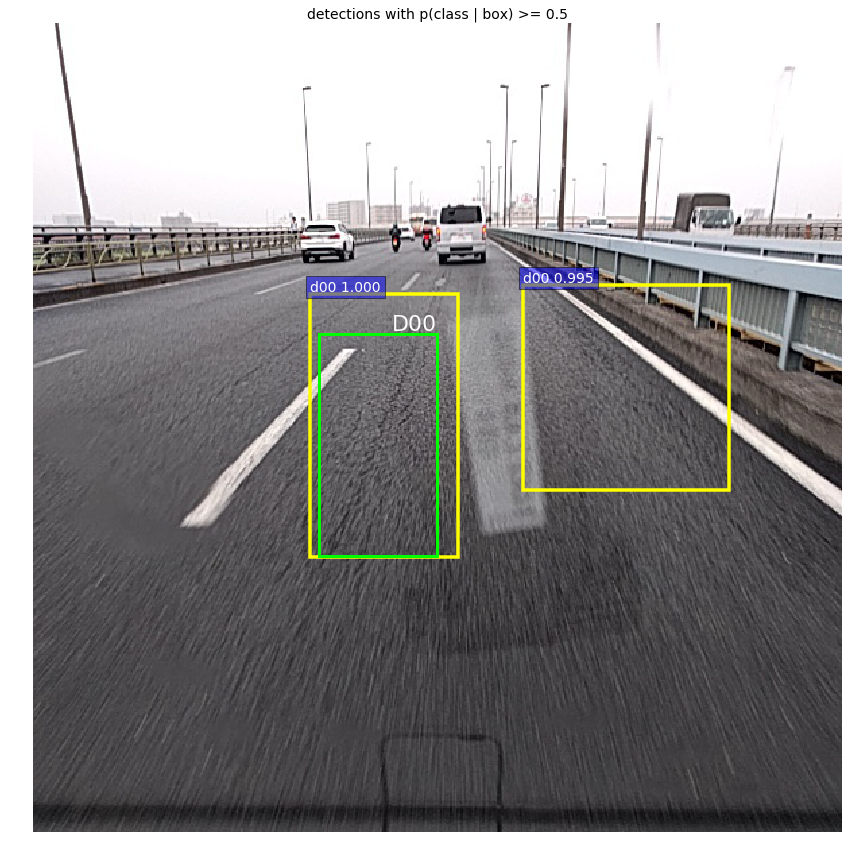

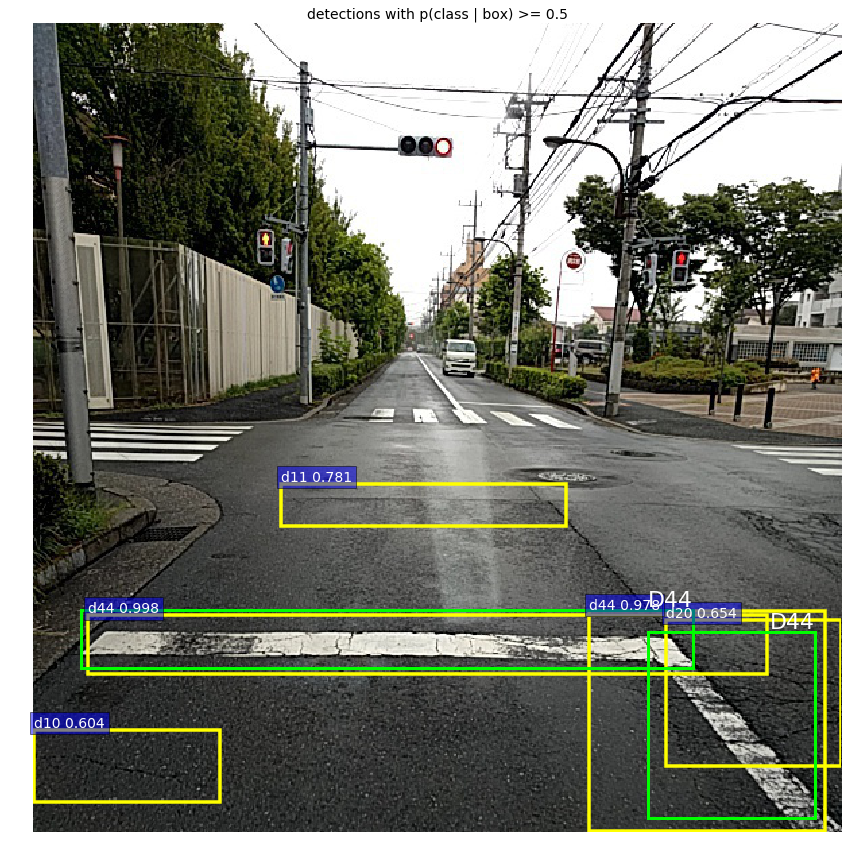

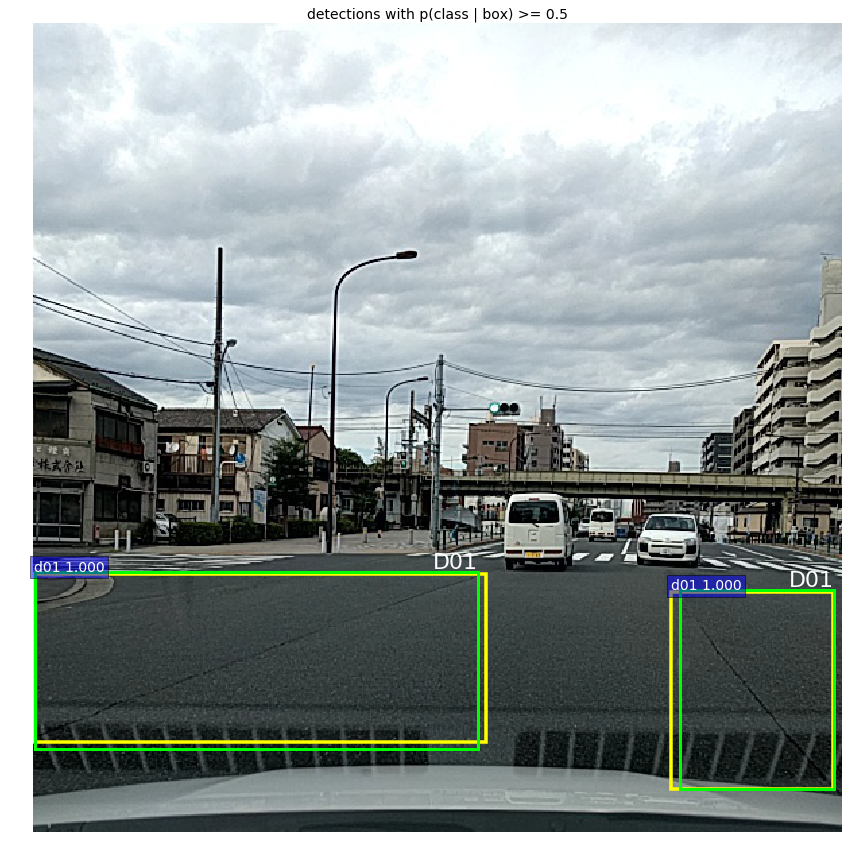

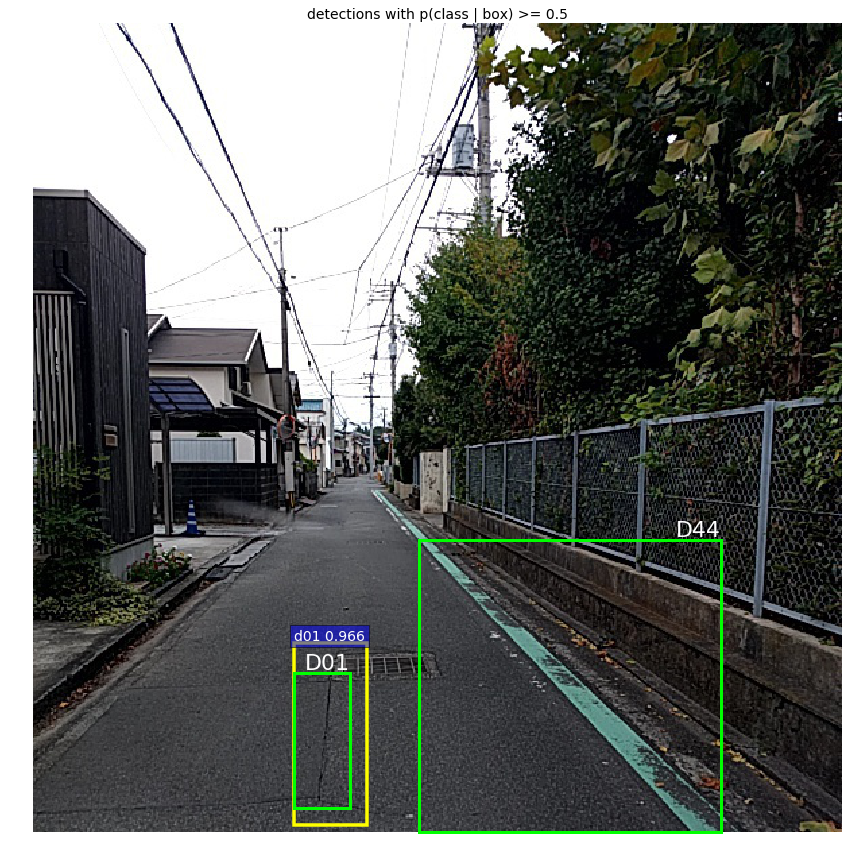

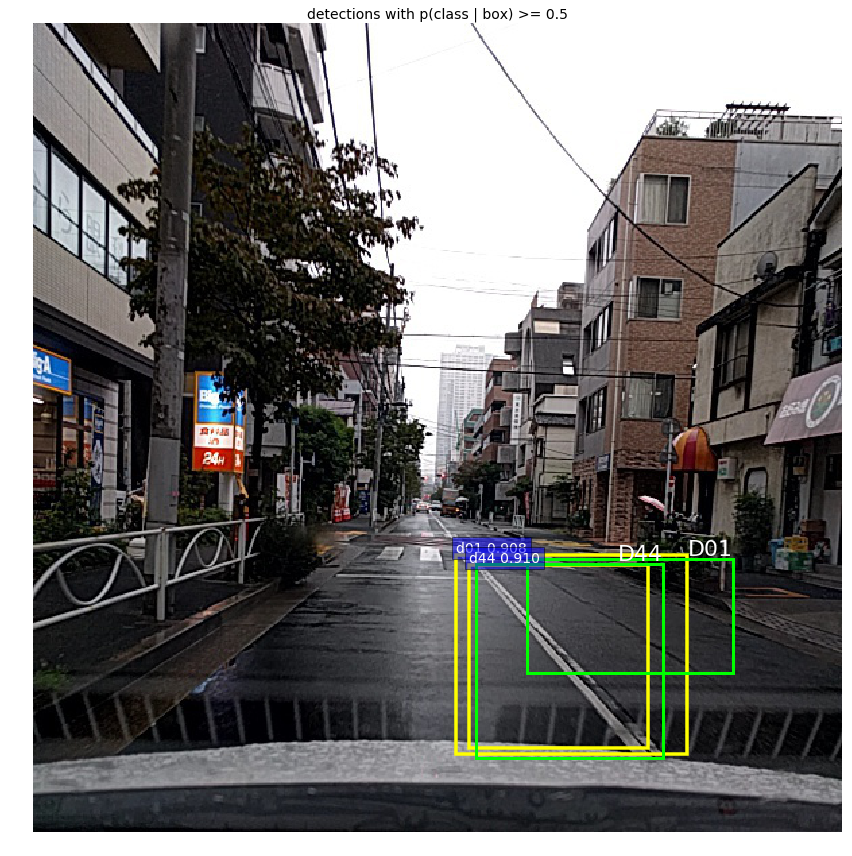

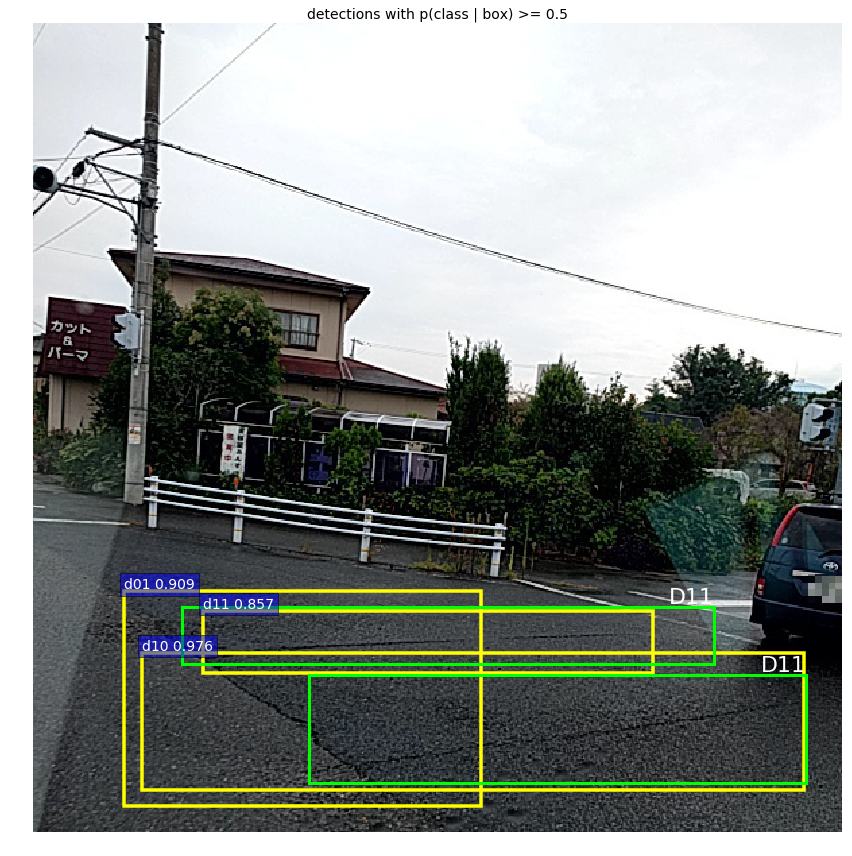

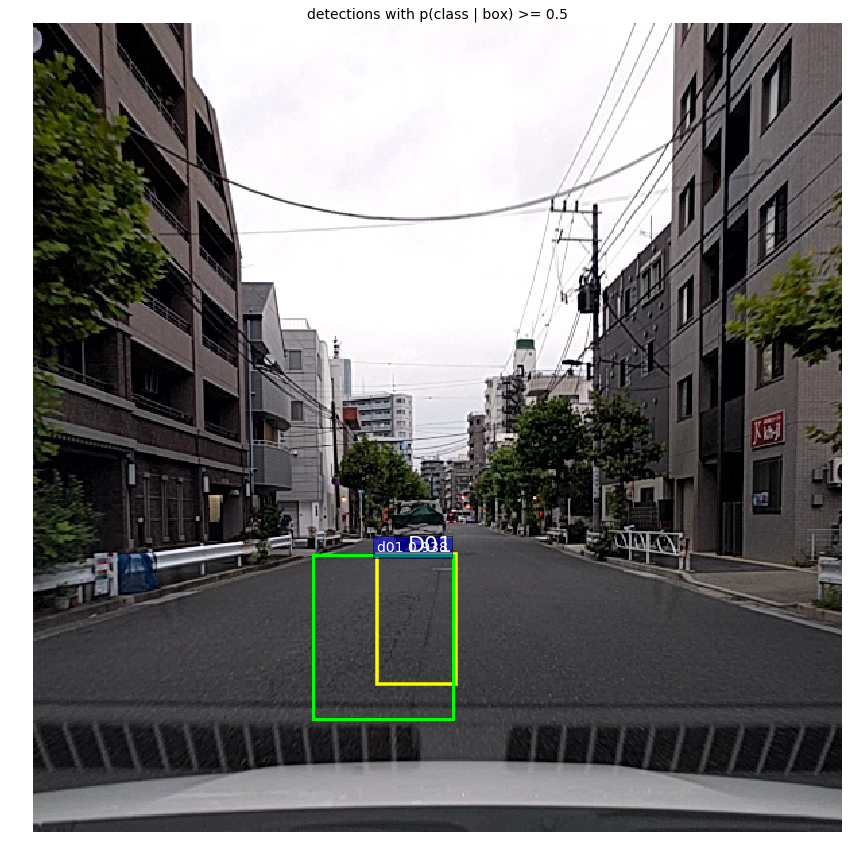

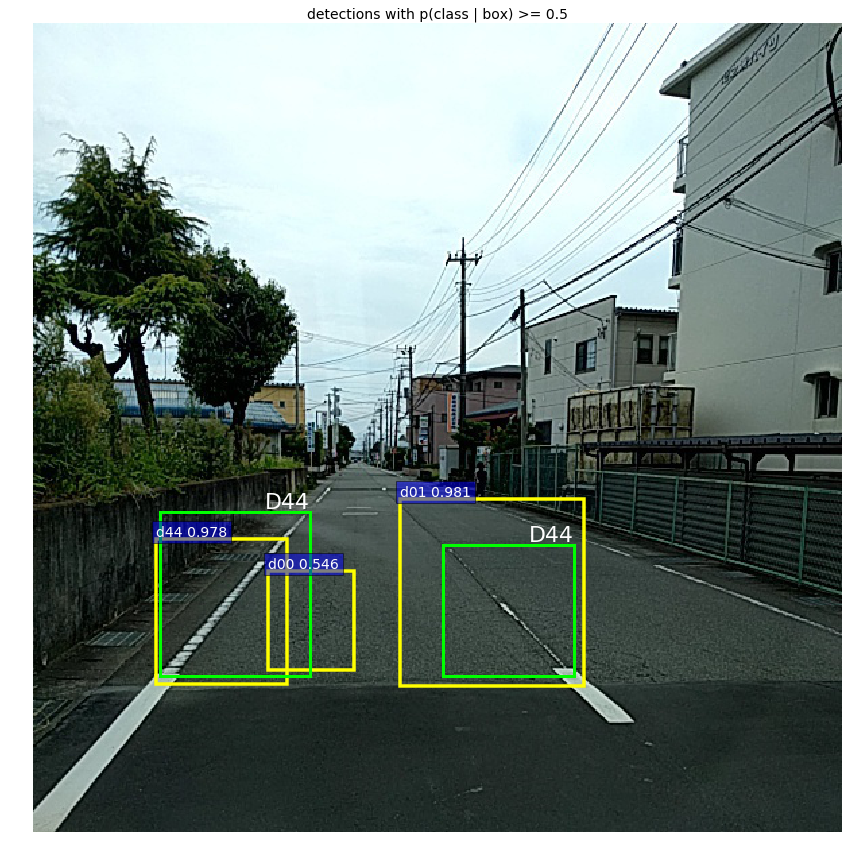

In [27]:
if True:
    cfg.TEST.HAS_RPN = True  # Use RPN for proposals

    # model path
    saved_model = os.path.join('../output', demonet, DATASETS[dataset][0], 'default',
                              NETS[demonet][0] %(70000 if dataset == 'pascal_voc' else 150000))

    print(saved_model)
    if not os.path.isfile(saved_model):
        raise IOError(('{:s} not found.\nDid you download the proper networks from '
                       'our server and place them properly?').format(saved_model))

    # load network
    if demonet == 'vgg16':
        net = vgg16()
    elif demonet == 'res101':
        net = resnetv1(num_layers=101)
    elif demonet == 'res50':
        net = resnetv1(num_layers=50)
    else:
        raise NotImplementedError
    net.create_architecture(10,
                          tag='default', anchor_scales=[8, 16, 32])

    net.load_state_dict(torch.load(saved_model, map_location=lambda storage, loc: storage))

    net.eval()
    if not torch.cuda.is_available():
        net._device = 'cpu'
    net.to(net._device)

    print('Loaded network {:s}'.format(saved_model))

    
    file_list_txt = os.path.join(cfg.DATA_DIR, 'rddc_2018/ImageSets', 'val.txt')
    with open(file_list_txt) as f:
        file_list = f.readlines()

    file_list = [x.strip() for x in file_list] 
    
    im_names = random.sample(file_list, 10)
    
#     im_names = ['train_Adachi_00008', 'train_Chiba_00004', 'train_Ichihara_00096', 'train_Sumida_00505',
#                 'train_Muroran_01269', 'train_Nagakute_00738', 'train_Adachi_00081', 'train_Numazu_00173']
    
    
    for idx, im_name in enumerate(im_names):
        print('~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~')
        print('Demo for data/demo/{}'.format(im_name))
        
        ann = load_annotation(im_name)
        
        ax = demo(net, im_name+".jpg")
        
        for obj in ann.find_all('object'):

            left = int(obj.xmin.text)
            bottom = int(obj.ymin.text)
            right = int(obj.xmax.text)
            top = int(obj.ymax.text)
            width = right-left
            height = top-bottom

            p = patches.Rectangle(
            (left, bottom), width, height,
            fill=False,  clip_on=False, lw=3, color=(0, 1, 0)
            )
            ax.add_patch(p)

            ax.text(right, bottom, obj.find('name').text,
                horizontalalignment='right',
                verticalalignment='bottom', fontsize=22, color='w'
                )

        plt.savefig("/home/kluger/tmp/faster_rcnn_resnet50/%04d.jpg" % idx)
            
    plt.show()
